# Predicting Caravan Insurance Purchases

#### Using the data compiled by Caravan Insurance, we will try to predict whether someone will purchase Caravan's mobile home insurance. We will use various classification models in combination with techniques to handle unbalanced datasets for our analysis.


#### Our analysis follows the following structure -
1. Data Exploration and Visualizations
2. Association Rule Mining For Understanding Cross Selling
3. Classification using Logistic Regression - Unbalanced Data, Undersampled Data, Oversampled Data - Including Business Cost For Each Model
4. Classification using KNN - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model
5. Classification using Naive Bayes - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model
6. Classification using Bagging - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model
7. Classification using Boosting - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model
8. Classification using Random Forest - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model
9. Summary of Performance Measures For All Models
10. Summary of Business Costs For All Models
11. Final Recommendation

# 1. Data Exploration And Visualizations

In [1]:
#Read the Data
caravan_df_maindataset <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Master_dataset.csv')
caravan_df_train <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Train.csv')
caravan_df_test <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Test_with_Targer_Variable.csv')

In [2]:
#Check Shape of Data and List Out All Columns
str(caravan_df_maindataset)

'data.frame':	9822 obs. of  86 variables:
 $ Customer_Subtype                             : int  33 37 37 9 40 23 39 33 33 11 ...
 $ Number_of_houses                             : int  1 1 1 1 1 1 2 1 1 2 ...
 $ Avg_size_household                           : int  3 2 2 3 4 2 3 2 2 3 ...
 $ Avg_age                                      : int  2 2 2 3 2 1 2 3 4 3 ...
 $ Customer_main_type                           : int  8 8 8 3 10 5 9 8 8 3 ...
 $ Roman_catholic                               : int  0 1 0 2 1 0 2 0 0 3 ...
 $ Protestant                                   : int  5 4 4 3 4 5 2 7 1 5 ...
 $ Other_religion                               : int  1 1 2 2 1 0 0 0 3 0 ...
 $ No_religion                                  : int  3 4 4 4 4 5 5 2 6 2 ...
 $ Married                                      : int  7 6 3 5 7 0 7 7 6 7 ...
 $ Living_together                              : int  0 2 2 2 1 6 2 2 0 0 ...
 $ Other_relation                               : int  2 2 4 2 2 3 0 0 3 2 ...


#### 'Number_of_mobile_home_policies' is the binary dependent variable that we will classify in our analysis

In [3]:
#Sample of the Data
head(caravan_df_maindataset)

Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant,Other_religion,No_religion,Married,⋯,Number_of_private_accident_insurance_policies,Number_of_family_accidents_insurance_policies,Number_of_disability_insurance_policies,Number_of_fire_policies,Number_of_surfboard_policies,Number_of_boat_policies,Number_of_bicycle_policies,Number_of_property_insurance_policies,Number_of_social_security_insurance_policies,Number_of_mobile_home_policies
33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# Ensure there are no missing values.
paste0("Missing values: ", sum(is.na(caravan_df_maindataset)))

[1] "Missing values: 0"

In [5]:
# Finding which features are numeric.
numeric_caravan <- which(sapply(caravan_df_maindataset,is.numeric))
str(caravan_df_maindataset[,numeric_caravan])

'data.frame':	9822 obs. of  86 variables:
 $ Customer_Subtype                             : int  33 37 37 9 40 23 39 33 33 11 ...
 $ Number_of_houses                             : int  1 1 1 1 1 1 2 1 1 2 ...
 $ Avg_size_household                           : int  3 2 2 3 4 2 3 2 2 3 ...
 $ Avg_age                                      : int  2 2 2 3 2 1 2 3 4 3 ...
 $ Customer_main_type                           : int  8 8 8 3 10 5 9 8 8 3 ...
 $ Roman_catholic                               : int  0 1 0 2 1 0 2 0 0 3 ...
 $ Protestant                                   : int  5 4 4 3 4 5 2 7 1 5 ...
 $ Other_religion                               : int  1 1 2 2 1 0 0 0 3 0 ...
 $ No_religion                                  : int  3 4 4 4 4 5 5 2 6 2 ...
 $ Married                                      : int  7 6 3 5 7 0 7 7 6 7 ...
 $ Living_together                              : int  0 2 2 2 1 6 2 2 0 0 ...
 $ Other_relation                               : int  2 2 4 2 2 3 0 0 3 2 ...


#### All features are numeric. Since, Number_of_mobile_home_policies is our dependent variable, let's make sure that it is binary by converting it to a factor


In [6]:
caravan_df_maindataset$Number_of_mobile_home_policies <- factor(caravan_df_maindataset$Number_of_mobile_home_policies, labels=c(0,1))


#### Let's Check How Unbalanced Our Data Is By Counting The Number of 1s and 0s In The Feature Number_of_mobile_home_policies


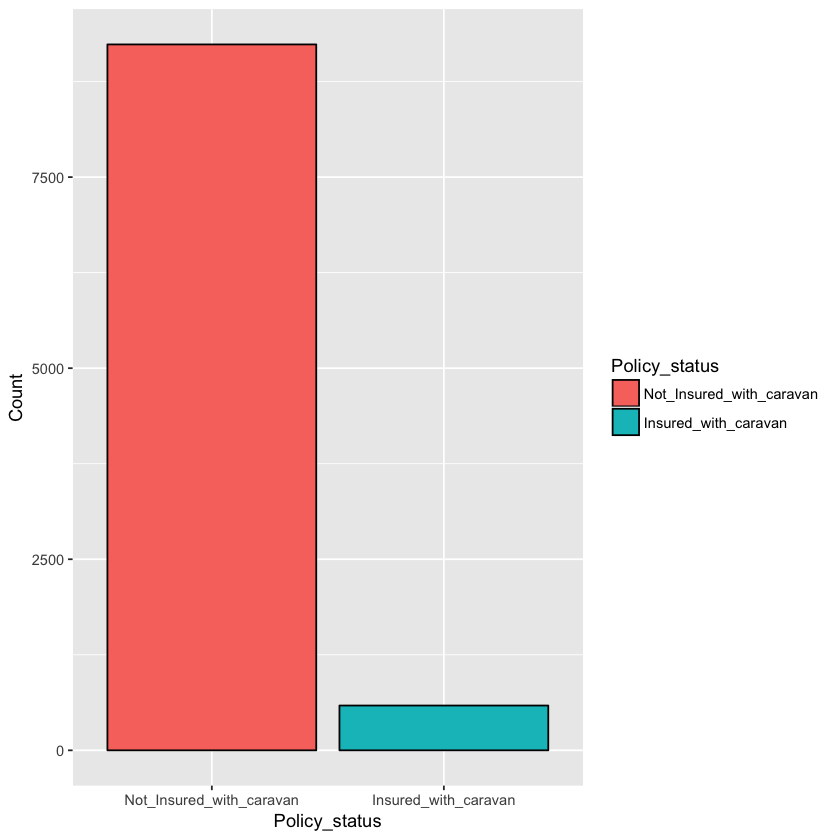

In [7]:
library(ggplot2)
library(plyr)


Not_Insured_with_caravan  <- sum(caravan_df_maindataset$Number_of_mobile_home_policies == 0)
Insured_with_caravan <- sum(caravan_df_maindataset$Number_of_mobile_home_policies == 1)

dat <- data.frame(
  Policy_status = factor(c("Not_Insured_with_caravan","Insured_with_caravan"), levels=c("Not_Insured_with_caravan","Insured_with_caravan")),
  Count = c( Not_Insured_with_caravan , Insured_with_caravan)
)

ggplot(data=dat, aes(x=Policy_status, y=Count, fill=Policy_status)) +
  geom_bar(colour="black", stat="identity")

In [8]:
Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(caravan_df_maindataset$Number_of_mobile_home_policies), Count = as.numeric(table(caravan_df_maindataset$Number_of_mobile_home_policies)))
Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,9236
1,586


#### It is clear that our dataset is highly unbalanced with only 5.9% of observations actually buying the insurance. Before we run our analysis and handle the unbalanced data, let's understand the characteristics of the observations that actually bought the 'mobile home insurance'. Since, it is a cross-selling problem, we will focus more on understanding which existing customers tend to also buy the 'mobile_home_insurance'.

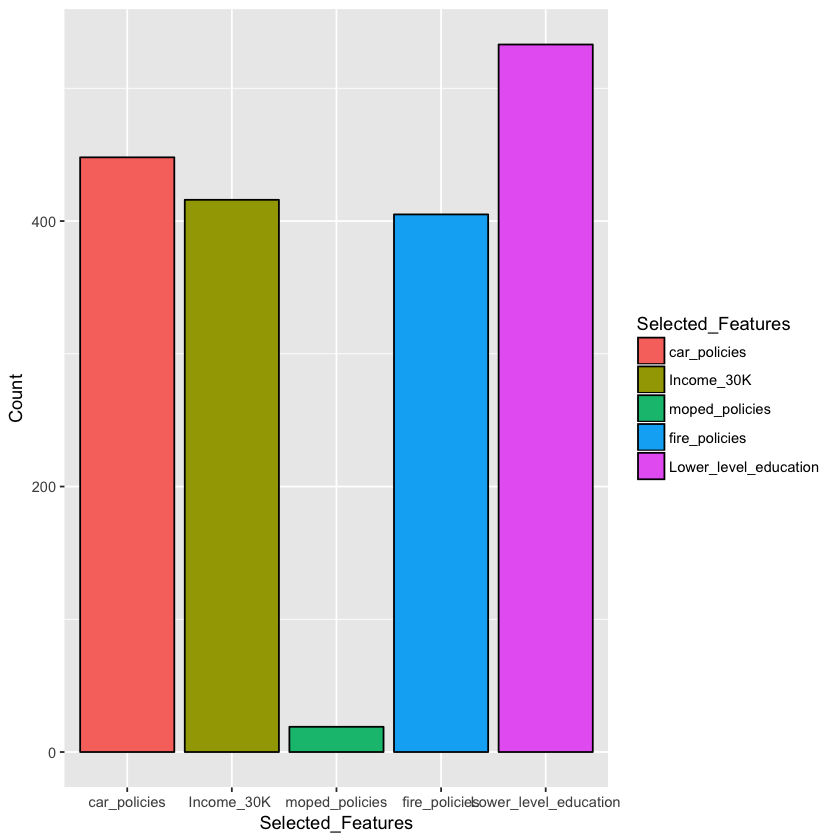

In [9]:
TrainDataset <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Master_dataset.csv')

car_policies <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$car_policies  != 0)
Income_30K <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Income_._30  != 0)
moped_policies <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$moped_policies  != 0)
fire_policies <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$fire_policies  != 0)
Lower_level_education <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Lower_level_education  != 0)


dat <- data.frame(
  Selected_Features = factor(c("car_policies" , "Income_30K " , "moped_policies" , "fire_policies"  , "Lower_level_education" ), levels=c("car_policies" , "Income_30K " , "moped_policies" , "fire_policies"  , "Lower_level_education")),
  Count = c( car_policies  ,  Income_30K  , moped_policies , fire_policies  , Lower_level_education )
)

ggplot(data=dat, aes(x=Selected_Features, y=Count, fill=Selected_Features)) +
  geom_bar(colour="black", stat="identity")



#### The above visualization shows characteristics of only the observations that actually bought the 'mobile home insurance'. It can be observed that existing customers of car_policies and fire_policies tend to also buy the 'mobile home insurance'. Moreover, the success class population is generally lower_level_education and Income_30K. Let's look at more features of the success class.



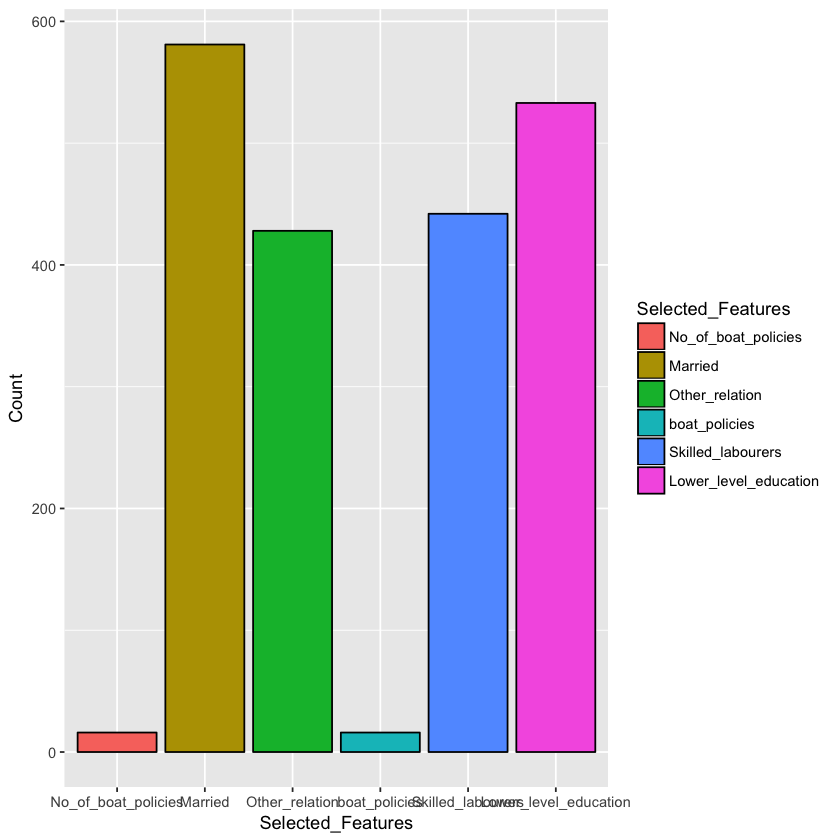

In [10]:
No_of_boat_policies <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Number_of_boat_policies != 0)
Married <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Married  != 0)
Other_relation <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Other_relation  != 0)
boat_policies <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$boat_policies  != 0)
Skilled_labourers <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Skilled_labourers  != 0)

Lower_level_education <- sum(TrainDataset$Number_of_mobile_home_policies == 1 & TrainDataset$Lower_level_education  != 0)


dat <- data.frame(
  Selected_Features = factor(c("No_of_boat_policies","Married" , "Other_relation" , "boat_policies" , "Skilled_labourers"  , "Lower_level_education" ), levels=c("No_of_boat_policies","Married" , "Other_relation" , "boat_policies" , "Skilled_labourers"  , "Lower_level_education")),
  Count = c(No_of_boat_policies, Married , Other_relation , boat_policies , Skilled_labourers, Lower_level_education)
)

ggplot(data=dat, aes(x=Selected_Features, y=Count, fill=Selected_Features)) +
  geom_bar(colour="black", stat="identity")

#### Both the above plots are based on the features that were indicated as important predictors from our analysis of bagging and random forest.

# 2. Association Rule Mining For Understanding Cross Selling

#### Since, Caravan had released this data to understand how to cross-sell its 'Mobile Home Policies' to its existing customers, one of the first approaches we took was to devise association rules to understand customers of which existing policies tend to also buy the 'mobile home policy' .

In [11]:
#Association Rule Mining
library(arules)
library(arulesViz)

train <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Train.csv', colClasses=c(rep('factor' , 86)))

## Association rule generation
rules <- apriori(data = train , parameter = list( supp = 0.001 , conf = 0.7) , appearance = list(default = "lhs" , rhs = "Number_of_mobile_home_policies=1") )

## Sorting rules based on confidence
rules <- sort(rules , decreasing = TRUE , by = 'confidence')

## Printing the rules
inspect(rules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[630 item(s), 5822 transaction(s)] done [0.03s].
sorting and recoding items ... [542 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4

Warning message in apriori(data = train, parameter = list(supp = 0.001, conf = 0.7), :
“Mining stopped (time limit reached). Only patterns up to a length of 4 returned!”

 done [45.36s].
writing ... [82 rule(s)] done [4.40s].
creating S4 object  ... done [1.09s].
     lhs                                                  rhs                                    support confidence     lift
[1]  {Social_class_B2=3,                                                                                                    
      Number_of_car_policies=1,                                                                                             
      Number_of_boat_policies=1}                       => {Number_of_mobile_home_policies=1} 0.001030574  1.0000000 16.72989
[2]  {Avg_age=3,                                                                                                            
      Social_class_B2=3,                                                                                                    
      Number_of_boat_policies=1}                       => {Number_of_mobile_home_policies=1} 0.001202336  1.0000000 16.72989
[3]  {Social_class_B2=3,        

#### As seen above, there exist rules with very high confidence, however, the support of these rules is very less. Since these metrics are data-dependent, lets look at the plot of confidence vs support to adjust them accordingly

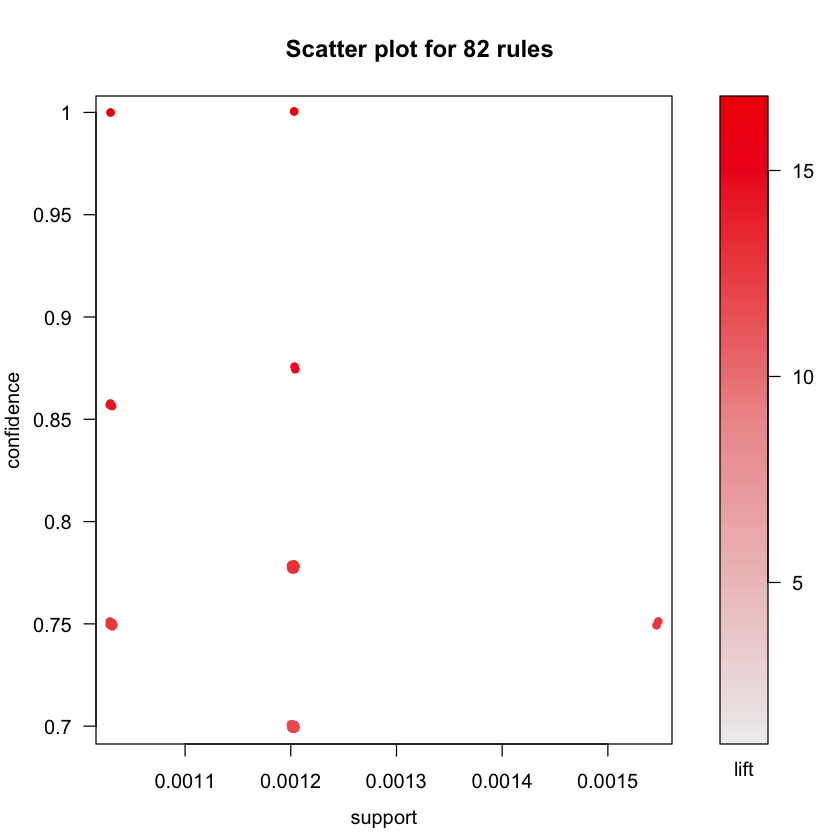

In [12]:
## Ploting the generated rules
plot(rules)

#### As seen in the above plot, if we take a support of greater than 0.0012, we would not get a rule with a confidence higher than 0.8. This is because our dataset is highly unbalanced and there are only few observations out of almost 6000 training observations that contribute to these rules. Having said that, the best rules we can obtain from this data will have a support of around 0.0012 and a confidence as high as 1.

In [13]:
#Re-running association rules with support = 0.0012 and confidence = 0.9
## Association rule generation
rules <- apriori(data = train , parameter = list( supp = 0.0012 , conf = 0.9) , appearance = list(default = "lhs" , rhs = "Number_of_mobile_home_policies=1") )

## Sorting rules based on confidence
rules <- sort(rules , decreasing = TRUE , by = 'confidence')

## Printing the rules
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5  0.0012      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[630 item(s), 5822 transaction(s)] done [0.03s].
sorting and recoding items ... [533 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4

Warning message in apriori(data = train, parameter = list(supp = 0.0012, conf = 0.9), :
“Mining stopped (time limit reached). Only patterns up to a length of 4 returned!”

 done [42.59s].
writing ... [1 rule(s)] done [3.50s].
creating S4 object  ... done [0.89s].
    lhs                            rhs                                    support confidence     lift
[1] {Avg_age=3,                                                                                      
     Social_class_B2=3,                                                                              
     Number_of_boat_policies=1} => {Number_of_mobile_home_policies=1} 0.001202336          1 16.72989


#### The above rule is associated with the best tradeoff we could get given our data. This rule has a very confidence and hence, can be considered a reliable rule. However, we must keep in mind that the support of this rule is low and it might just occur due to a chance factor.

#### This rule indicates that the Caravan's existing customers of boat policies also tend to have Caravan's mobile home policies. This might be a useful insight for Caravan to implement cross selling. However, since this rule has a low support, we decided to dig deep into each of the characteristics of the observations that buy caravan's mobile home policies. We have built classification models that are aimed at understanding who will buy the caravan's mobile home insurance and who will not. Since our dataset is highly imbalanced, we have run each of our classification model using techniques such as oversampling and undersampling

# 3. Classification using Logistic Regression - Unbalanced Data, Undersampled Data, Oversampled Data - Including Business Cost For Each Model

### Logistic Using Unbalanced Data

In [14]:
probabilityDF <- data.frame(matrix(ncol = 20, nrow = 4000))

In [15]:
#LR Pre-Processing
caravan_df_trainLR <- caravan_df_train
caravan_df_testLR <- caravan_df_test
caravan_df_trainLR$Number_of_mobile_home_policies <- factor(caravan_df_trainLR$Number_of_mobile_home_policies, labels = c(0,1))
library(dummies)
caravan_df_trainLR <- dummy.data.frame(caravan_df_trainLR, sep = ".", names = c("Customer_main_type","Customer_Subtype"))
caravan_df_testLR <- dummy.data.frame(caravan_df_testLR, sep = ".", names = c("Customer_main_type","Customer_Subtype"))

dummies-1.5.6 provided by Decision Patterns



In [16]:
#Classify Using Logistic Regression
logisticTrainingFit <- glm(Number_of_mobile_home_policies ~ ., family = "binomial", data = caravan_df_trainLR)
logisticTrainingFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = Number_of_mobile_home_policies ~ ., family = "binomial", 
    data = caravan_df_trainLR)

Coefficients:
                                  (Intercept)  
                                   255.779832  
                           Customer_Subtype.1  
                                     0.298357  
                           Customer_Subtype.2  
                                     0.626285  
                           Customer_Subtype.3  
                                     0.775459  
                           Customer_Subtype.4  
                                    -0.483366  
                           Customer_Subtype.5  
                                     0.403773  
                           Customer_Subtype.6  
                                     0.603530  
                           Customer_Subtype.7  
                                    -0.218449  
                           Customer_Subtype.8  
                                     0.752301  
          

In [17]:
#Predict Class And Display Confusion Matrix
LOutPredicted <- predict(logisticTrainingFit, caravan_df_testLR, type = "response")
LOutPredictedClass <- ifelse(LOutPredicted>0.5, 1, 0)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [18]:
LOutActual <- caravan_df_testLR$Number_of_mobile_home_policies

In [19]:
LConfusionOutPredicted <- table(LOutActual, LOutPredictedClass)
rownames(LConfusionOutPredicted) <- c("0","1")
colnames(LConfusionOutPredicted) <- c("0","1")
LConfusionOutPredicted
for (i in 1:4000){
    probabilityDF$LR[i] <- LOutPredicted[i]
    }

          LOutPredictedClass
LOutActual    0    1
         0 3757    5
         1  235    3

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



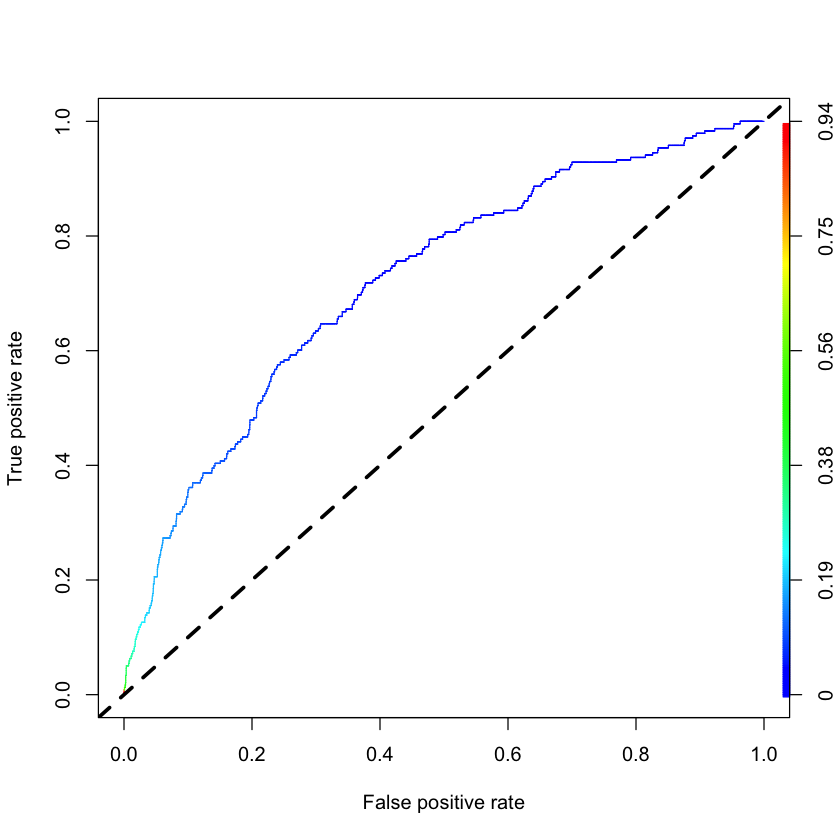

In [20]:
# Plot ROC and AUC for LR
probs <- LOutPredicted
library(ROCR)
LRPred <- prediction(probs, caravan_df_testLR$Number_of_mobile_home_policies)
LRPerf <- performance(LRPred, "tpr", "fpr")
plot(LRPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")

In [21]:
#AUC
performance(LRPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7209613


Slot "alpha.values":
list()


In [22]:
#Corresponding Performance Measures
LRPrediction <- factor(as.factor(LOutPredictedClass), c(0, 1), labels = c("Not Purchased", "Purchased"))
LRActual <- factor(as.factor(caravan_df_testLR$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMLR <- confusionMatrix(LRActual, LRPrediction, negative = "Not Purchased" )
diagnosticErrors(CMLR)

acc       sens       spec        ppv        npv        lor 
0.94000000 0.01260504 0.99867092 0.37500000 0.94113226 2.26096491 
attr(,"negative")
[1] "Not Purchased"

### Logistic Regression Using Undersampled Data

In [23]:
#Under Sampling Data
#Taking all the observations with dependent variable = 1
caravan_df_train_LR_Under <- caravan_df_trainLR[caravan_df_trainLR$Number_of_mobile_home_policies==1,]

In [24]:
#Randomly select observations with dependent variable = 0
zeroObs <- caravan_df_trainLR[caravan_df_trainLR$Number_of_mobile_home_policies==0,]
set.seed(123457)
rearrangedZeroObs <-  zeroObs[sample(nrow(zeroObs), length(caravan_df_train_LR_Under$Number_of_mobile_home_policies)),]

In [25]:
#Appending rows of randomly selected 0s in our undersampled data frame
caravan_df_train_LR_Under <- rbind(caravan_df_train_LR_Under, rearrangedZeroObs)

In [26]:
#Let's verify that number of 1s and 0s in our undersampled data are equal
undersampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_LR_Under$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_LR_Under$Number_of_mobile_home_policies)))
undersampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,348
1,348


In [27]:
#Classify Using Logistic Regression with Undersampling
logisticTrainingFit <- glm(Number_of_mobile_home_policies ~ ., family = "binomial", data = caravan_df_train_LR_Under)
logisticTrainingFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = Number_of_mobile_home_policies ~ ., family = "binomial", 
    data = caravan_df_train_LR_Under)

Coefficients:
                                  (Intercept)  
                                    2.845e+02  
                           Customer_Subtype.1  
                                    1.154e+00  
                           Customer_Subtype.2  
                                    1.533e+00  
                           Customer_Subtype.3  
                                    1.563e+00  
                           Customer_Subtype.4  
                                    8.962e-01  
                           Customer_Subtype.5  
                                   -6.599e-02  
                           Customer_Subtype.6  
                                    1.983e+00  
                           Customer_Subtype.7  
                                    1.793e+01  
                           Customer_Subtype.8  
                                    1.612e+00  
   

In [28]:
#Predict Class And Display Confusion Matrix
LOutPredicted <- predict(logisticTrainingFit, caravan_df_testLR, type = "response")
LOutPredictedClass <- ifelse(LOutPredicted>0.5, 1, 0)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [29]:
LOutActual <- caravan_df_testLR$Number_of_mobile_home_policies

In [30]:
LConfusionOutPredicted <- table(LOutActual, LOutPredictedClass)
rownames(LConfusionOutPredicted) <- c("0","1")
colnames(LConfusionOutPredicted) <- c("0","1")
LConfusionOutPredicted
for (i in 1:4000){
    probabilityDF$LRU[i] <- LOutPredicted[i]
    }

          LOutPredictedClass
LOutActual    0    1
         0 2405 1357
         1   83  155

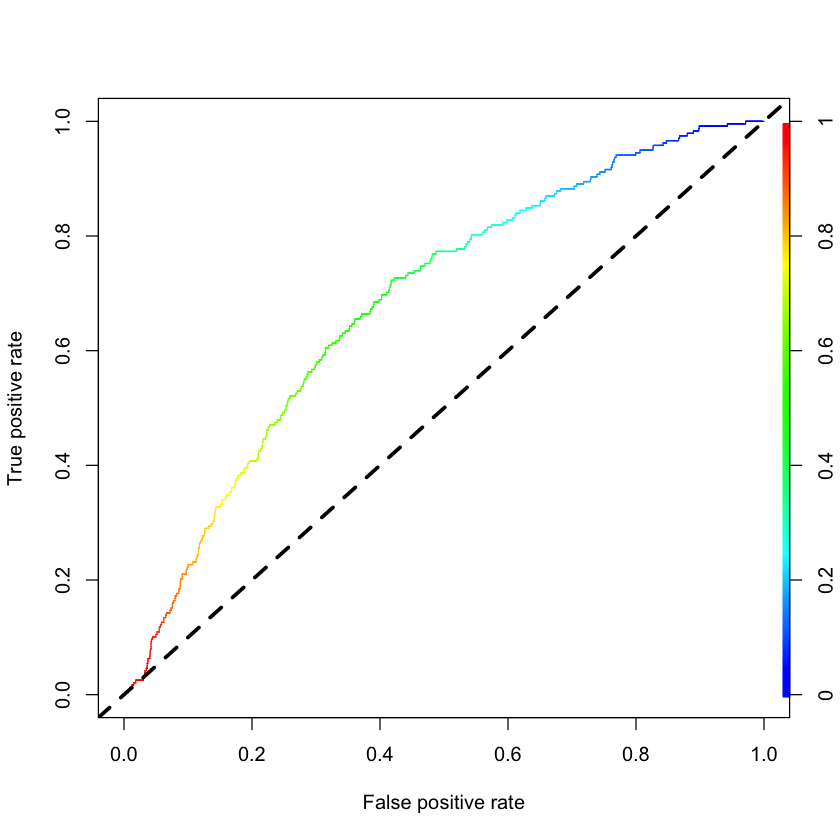

In [31]:
# Plot ROC and AUC for LR
probs <- LOutPredicted
library(ROCR)
LRPred <- prediction(probs, caravan_df_testLR$Number_of_mobile_home_policies)
LRPerf <- performance(LRPred, "tpr", "fpr")
plot(LRPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")

In [32]:
#AUC
performance(LRPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6820203


Slot "alpha.values":
list()


In [33]:
#Corresponding Performance Measures
LRPrediction <- factor(as.factor(LOutPredictedClass), c(0, 1), labels = c("Not Purchased", "Purchased"))
LRActual <- factor(as.factor(caravan_df_testLR$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMLR <- confusionMatrix(LRActual, LRPrediction, negative = "Not Purchased" )
diagnosticErrors(CMLR)

acc      sens      spec       ppv       npv       lor 
0.6400000 0.6512605 0.6392876 0.1025132 0.9666399 1.1968580 
attr(,"negative")
[1] "Not Purchased"

### Logistic Regression Using Oversampling

In [34]:
#First let's recall the ratio of 1s and 0s in our original training dataset
paste0("Ratio of 1s to 0s- 1:", as.numeric(table(caravan_df_trainLR$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_trainLR$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s- 1:15.7298850574713"

In [35]:
#Now let's duplicate the observations with dependent variable = 1 to make the ratio approximately 1:2
caravan_df_train_LR_OverDummy <- caravan_df_trainLR[caravan_df_trainLR$Number_of_mobile_home_policies==1,]
caravan_df_train_LR_Over <- NULL
for (i in 1:7){
    caravan_df_train_LR_Over <- rbind(caravan_df_train_LR_Over, caravan_df_train_LR_OverDummy)
}
caravan_df_train_LR_Over <- rbind(caravan_df_train_LR_Over, caravan_df_trainLR[caravan_df_trainLR$Number_of_mobile_home_policies==0,])

In [36]:
#Let's verify the number of 1s and 0s in our oversampled data
oversampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_LR_Over$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_LR_Over$Number_of_mobile_home_policies)))
oversampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,5474
1,2436


In [37]:
#Let's verify the ratio of 1s to 0s after over sampling
paste0("Ratio of 1s to 0s After Oversampling- 1:", as.numeric(table(caravan_df_train_LR_Over$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_train_LR_Over$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s After Oversampling- 1:2.24712643678161"

In [38]:
#Classify Using Logistic Regression with Oversampling
logisticTrainingFit <- glm(Number_of_mobile_home_policies ~ ., family = "binomial", data = caravan_df_train_LR_Over)
logisticTrainingFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = Number_of_mobile_home_policies ~ ., family = "binomial", 
    data = caravan_df_train_LR_Over)

Coefficients:
                                  (Intercept)  
                                   271.983948  
                           Customer_Subtype.1  
                                     0.188433  
                           Customer_Subtype.2  
                                     0.471638  
                           Customer_Subtype.3  
                                     0.782514  
                           Customer_Subtype.4  
                                    -0.327808  
                           Customer_Subtype.5  
                                     0.657871  
                           Customer_Subtype.6  
                                     0.363745  
                           Customer_Subtype.7  
                                     0.029915  
                           Customer_Subtype.8  
                                     0.808550  
    

In [39]:
#Predict Class And Display Confusion Matrix
LOutPredicted <- predict(logisticTrainingFit, caravan_df_testLR, type = "response")
LOutPredictedClass <- ifelse(LOutPredicted>0.5, 1, 0)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [40]:
LOutActual <- caravan_df_testLR$Number_of_mobile_home_policies

In [41]:
LConfusionOutPredicted <- table(LOutActual, LOutPredictedClass)
rownames(LConfusionOutPredicted) <- c("0","1")
colnames(LConfusionOutPredicted) <- c("0","1")
LConfusionOutPredicted
for (i in 1:4000){
    probabilityDF$LRO[i] <- LOutPredicted[i]
    }
for (i in 1:4000){
    probabilityDF$Actual[i] <- LOutActual[i]
    }

          LOutPredictedClass
LOutActual    0    1
         0 3348  414
         1  154   84

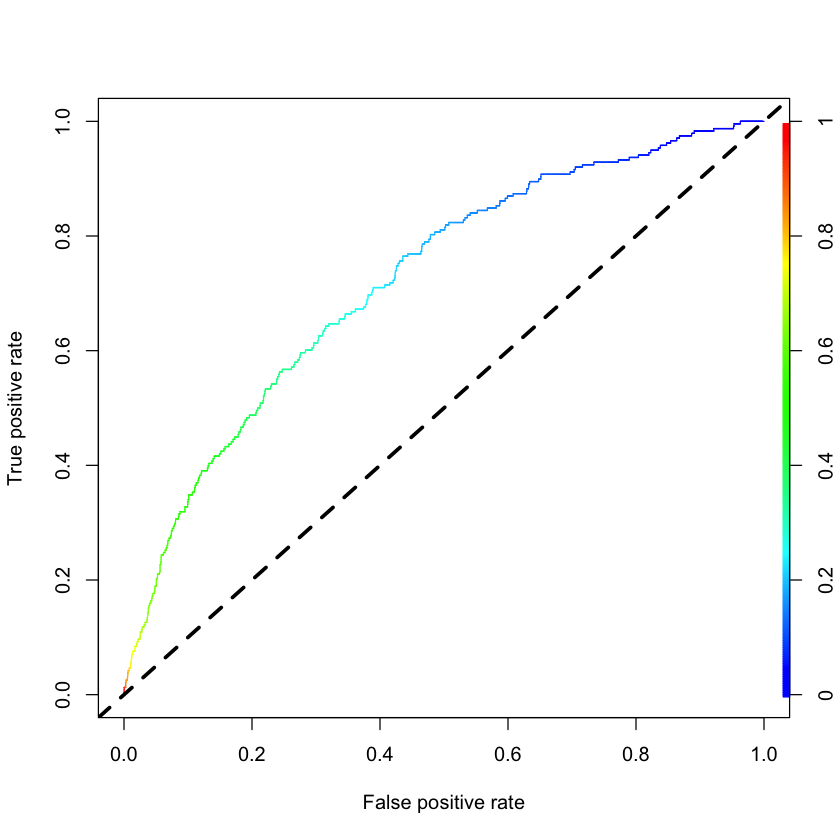

In [42]:
# Plot ROC and AUC for LR
probs <- LOutPredicted
library(ROCR)
LRPred <- prediction(probs, caravan_df_testLR$Number_of_mobile_home_policies)
LRPerf <- performance(LRPred, "tpr", "fpr")
plot(LRPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")

In [43]:
#AUC
performance(LRPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7209925


Slot "alpha.values":
list()


In [44]:
#Corresponding Performance Measures
LRPrediction <- factor(as.factor(LOutPredictedClass), c(0, 1), labels = c("Not Purchased", "Purchased"))
LRActual <- factor(as.factor(caravan_df_testLR$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMLR <- confusionMatrix(LRActual, LRPrediction, negative = "Not Purchased" )
diagnosticErrors(CMLR)

acc      sens      spec       ppv       npv       lor 
0.8580000 0.3529412 0.8899522 0.1686747 0.9560251 1.4841167 
attr(,"negative")
[1] "Not Purchased"

# 4. Classification using KNN - Unbalanced Data, Undersampled Data, Oversampled Data - Including Business Cost For Each Model

### KNN Using Unbalanced Data

In [45]:
#Classify Using KNN
#Normalizing each variable
fun <- function(x)
{    
    a <- mean(x)    
    b <- sd(x)    
    (x - a)/(b)
}

In [46]:
library(class)

caravan_df_train_normalized <- apply(caravan_df_train, 2, fun)
caravan_df_test_normalized <- apply(caravan_df_test, 2, fun)

train_input <- as.matrix(caravan_df_train_normalized[,-86])
train_output <- as.vector(caravan_df_train_normalized[,86])
test_input <- as.matrix(caravan_df_test_normalized[,-86])

In [47]:
kmax <- 15
ER1 <- rep(0,kmax)
ER2 <- rep(0,kmax)

In [48]:
for (i in 1:kmax){
    prediction <- knn(train_input, train_input,train_output, k=i)
    prediction2 <- knn(train_input, test_input, train_output, k=i)

#Confusion Matrix For Test Data
CM2 <- table(prediction2, caravan_df_test_normalized[,'Number_of_mobile_home_policies'])

#Error Rate on the test sample
ER2[i] <- (CM2[1,2]+CM2[2,1])/sum(CM2)
}

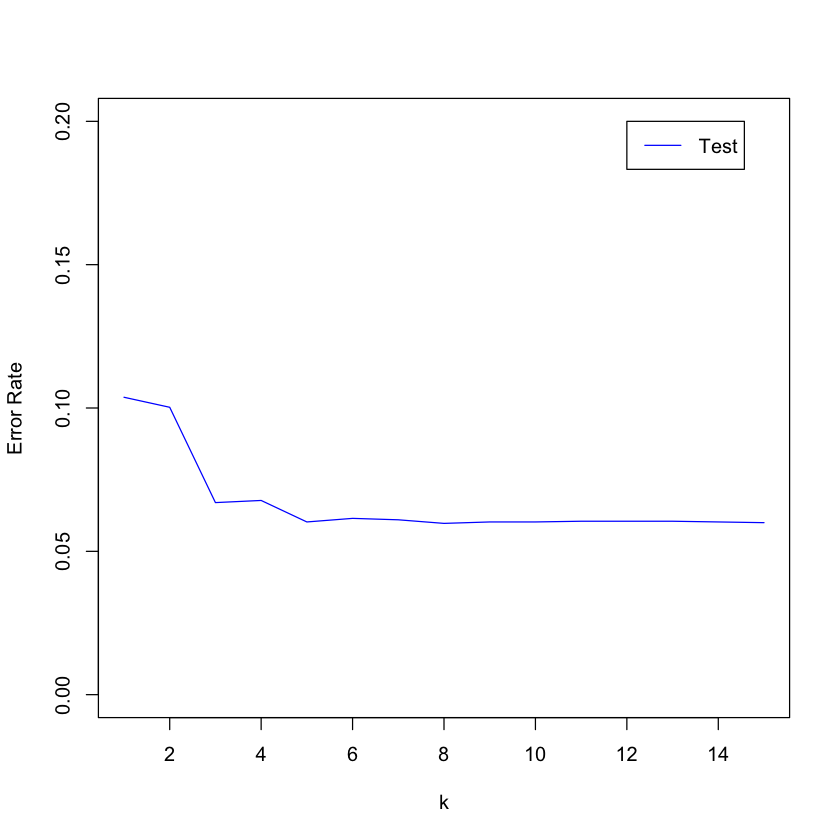

In [49]:
#Plotting the %Error on the test sample
plot(c(1,kmax),c(0,0.2),type="n", xlab="k",ylab="Error Rate")
lines(ER2,col="blue")
legend(12, 0.2, c("Test"),lty=c(1,1), col=c("blue"))

In [50]:
# Minimum Validation Error k
z <- which.min(ER2)
cat("Minimum Validation Error k:", z)

Minimum Validation Error k: 8

In [51]:
#Running knn for Minimum Validation Error k
prediction2 <- knn(train_input, test_input, train_output, k=z)
actual <- ifelse(caravan_df_test_normalized[,'Number_of_mobile_home_policies']>0,1,0)
predicted <- ifelse(as.numeric(prediction2)==1,0,1)
table(actual, predicted)

      predicted
actual    0    1
     0 3754    8
     1  237    1

In [52]:
#Running knn for Minimum Validation Error k with prob=TRUE
prediction2 <- knn(train_input, test_input, train_output, k=15, prob = TRUE)
prob <- attr(prediction2, "prob")

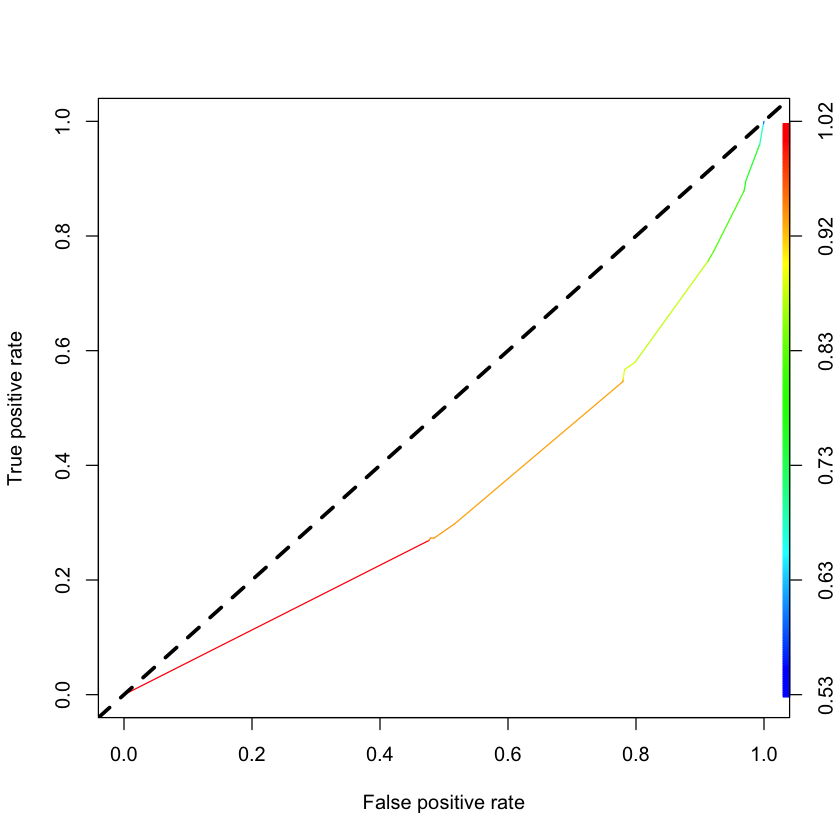

In [53]:
# Plot ROC and AUC for KNN
library(ROCR)
KNNPred <- prediction(prob, caravan_df_test_normalized[,'Number_of_mobile_home_policies'])
KNNPerf <- performance(KNNPred, "tpr", "fpr")
plot(KNNPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$KNN[i] <- prob[i]
    }

In [54]:
#AUC
performance(KNNPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.3485306


Slot "alpha.values":
list()


In [55]:
#Corresponding Performance Measures
KNNPrediction <- factor(as.factor(prediction2), labels = c("Not Purchased", "Purchased"))
KNNActual <- factor(as.factor(caravan_df_test_normalized[,'Number_of_mobile_home_policies']), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(KNNActual, KNNPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc      sens      spec       ppv       npv       lor 
0.9400000 0.0000000 0.9994684 0.0000000 0.9404702      -Inf 
attr(,"negative")
[1] "Not Purchased"

### KNN Using Undersampled Data

In [56]:
#Under Sampling Data
#Taking all the observations with dependent variable = 1
caravan_df_train_KNN_Under <- caravan_df_train[caravan_df_train$Number_of_mobile_home_policies==1,]

In [57]:
#Randomly select observations with dependent variable = 0
zeroObs <- caravan_df_train[caravan_df_train$Number_of_mobile_home_policies==0,]
set.seed(123457)
rearrangedZeroObs <-  zeroObs[sample(nrow(zeroObs), length(caravan_df_train_KNN_Under$Customer_Subtype)),]

In [58]:
#Appending rows of randomly selected 0s in our undersampled data frame
caravan_df_train_KNN_Under <- rbind(caravan_df_train_KNN_Under, rearrangedZeroObs)

In [59]:
#Let's verify that number of 1s and 0s in our undersampled data are equal
undersampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_KNN_Under$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_KNN_Under$Number_of_mobile_home_policies)))
undersampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,348
1,348


In [60]:
#Classify Using KNN
#Normalizing each variable
fun <- function(x)
{    
    a <- mean(x)    
    b <- sd(x)    
    (x - a)/(b)
}

In [61]:
library(class)

caravan_df_train_normalized <- apply(caravan_df_train_KNN_Under, 2, fun)
caravan_df_test_normalized <- apply(caravan_df_test, 2, fun)

train_input <- as.matrix(caravan_df_train_normalized[,-86])
train_output <- as.vector(caravan_df_train_normalized[,86])
test_input <- as.matrix(caravan_df_test_normalized[,-86])

In [62]:
kmax <- 15
ER1 <- rep(0,kmax)
ER2 <- rep(0,kmax)

In [63]:
for (i in 1:kmax){
    prediction <- knn(train_input, train_input,train_output, k=i)
    prediction2 <- knn(train_input, test_input, train_output, k=i)

#Confusion Matrix For Test Data
CM2 <- table(prediction2, caravan_df_test_normalized[,'Number_of_mobile_home_policies'])

#Error Rate on the test sample
ER2[i] <- (CM2[1,2]+CM2[2,1])/sum(CM2)
}

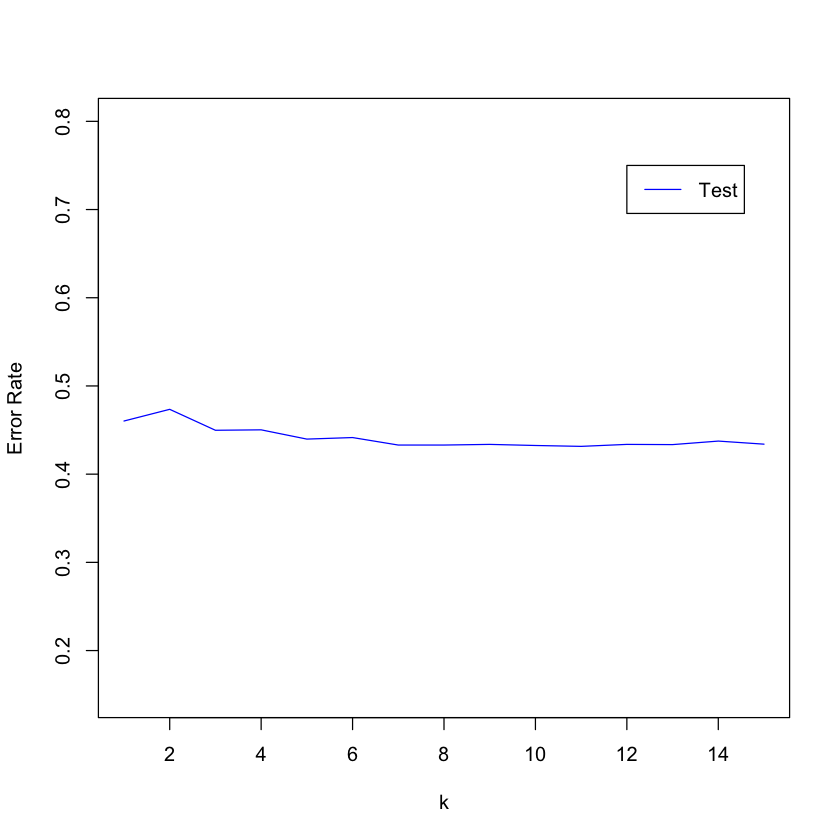

In [64]:
#Plotting the %Error on the test sample
plot(c(1,kmax),c(0.15,0.8),type="n", xlab="k",ylab="Error Rate")
lines(ER2, col="blue")
legend(12, 0.75, c("Test"),lty=c(1,1), col=c("blue"))

In [65]:
# Minimum Validation Error k
z <- which.min(ER2)
cat("Minimum Validation Error k:", z)

Minimum Validation Error k: 11

In [66]:
#Running knn for Minimum Validation Error k
prediction2 <- knn(train_input, test_input, train_output, k=z)
actual <- ifelse(caravan_df_test_normalized[,'Number_of_mobile_home_policies']>0,1,0)
predicted <- ifelse(as.numeric(prediction2)==1,0,1)
table(actual, predicted)

      predicted
actual    0    1
     0 2104 1658
     1   73  165

In [67]:
#Running knn for Minimum Validation Error k with prob=TRUE
prediction2 <- knn(train_input, test_input, train_output, k=15, prob = TRUE)
prob <- attr(prediction2, "prob")

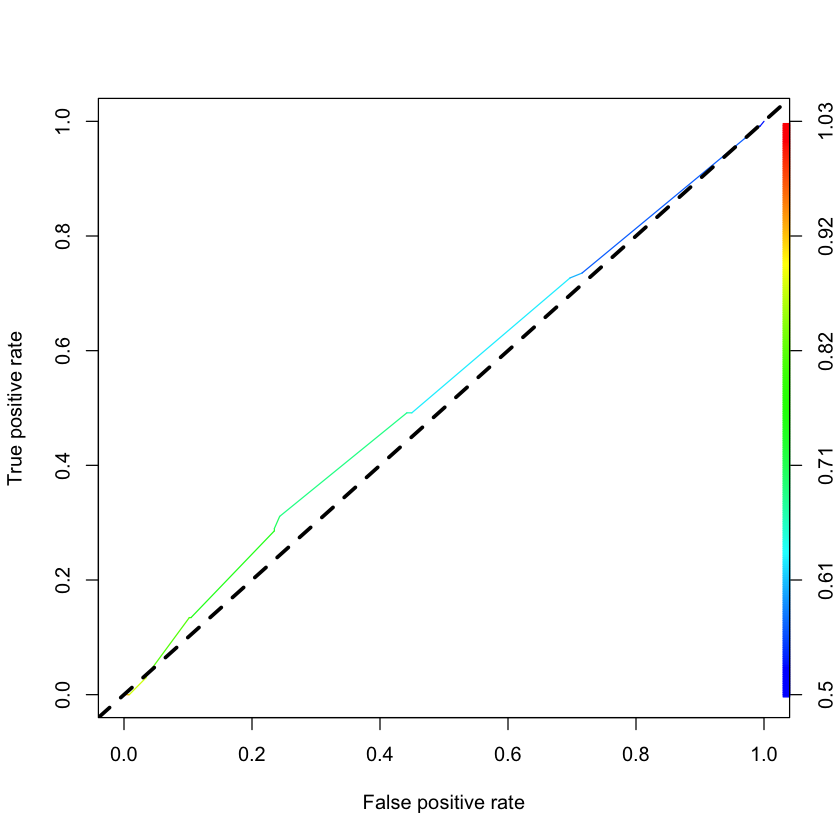

In [68]:
# Plot ROC and AUC for KNN
library(ROCR)
KNNPred <- prediction(prob, caravan_df_test$Number_of_mobile_home_policies)
KNNPerf <- performance(KNNPred, "tpr", "fpr")
plot(KNNPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$KNNU[i] <- prob[i]
    }

In [69]:
#AUC
performance(KNNPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.5304873


Slot "alpha.values":
list()


In [70]:
#Corresponding Performance Measures
KNNPrediction <- factor(as.factor(prediction2), labels = c("Not Purchased", "Purchased"))
KNNActual <- factor(as.factor(caravan_df_test_normalized[,'Number_of_mobile_home_policies']), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(KNNActual, KNNPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc       sens       spec        ppv        npv        lor 
0.56650000 0.64705882 0.56140351 0.08536585 0.96174863 0.85299588 
attr(,"negative")
[1] "Not Purchased"

### KNN Using Oversampled Data

In [71]:
#First let's recall the ratio of 1s and 0s in our original training dataset
paste0("Ratio of 1s to 0s- 1:", as.numeric(table(caravan_df_train$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_train$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s- 1:15.7298850574713"

In [72]:
#Now let's duplicate the observations with dependent variable = 1 to make the ratio approximately 1:2
caravan_df_train_KNN_OverDummy <- caravan_df_train[caravan_df_train$Number_of_mobile_home_policies==1,]
caravan_df_train_KNN_Over <- NULL
for (i in 1:7){
    caravan_df_train_KNN_Over <- rbind(caravan_df_train_KNN_Over, caravan_df_train_KNN_OverDummy)
}
caravan_df_train_KNN_Over <- rbind(caravan_df_train_KNN_Over, caravan_df_train[caravan_df_train$Number_of_mobile_home_policies==0,])

In [120]:
#Let's verify the number of 1s and 0s in our oversampled data
oversampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_KNN_Over$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_KNN_Over$Number_of_mobile_home_policies)))
oversampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,5474
1,2436


In [74]:
#Let's verify the ratio of 1s to 0s after over sampling
paste0("Ratio of 1s to 0s After Oversampling- 1:", as.numeric(table(caravan_df_train_KNN_Over$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_train_KNN_Over$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s After Oversampling- 1:2.24712643678161"

In [75]:
#Classify Using KNN
#Normalizing each variable
fun <- function(x)
{    
    a <- mean(x)    
    b <- sd(x)    
    (x - a)/(b)
}

In [76]:
library(class)

caravan_df_train_normalized <- apply(caravan_df_train_KNN_Over, 2, fun)
caravan_df_test_normalized <- apply(caravan_df_test, 2, fun)

train_input <- as.matrix(caravan_df_train_normalized[,-86])
train_output <- as.vector(caravan_df_train_normalized[,86])
test_input <- as.matrix(caravan_df_test_normalized[,-86])

In [77]:
kmax <- 15
ER1 <- rep(0,kmax)
ER2 <- rep(0,kmax)

In [78]:
for (i in 1:kmax){
    prediction <- knn(train_input, train_input,train_output, k=i)
    prediction2 <- knn(train_input, test_input, train_output, k=i)

#Confusion Matrix For Test Data
CM2 <- table(prediction2, caravan_df_test_normalized[,'Number_of_mobile_home_policies'])

#Error Rate on the test sample
ER2[i] <- (CM2[1,2]+CM2[2,1])/sum(CM2)
}

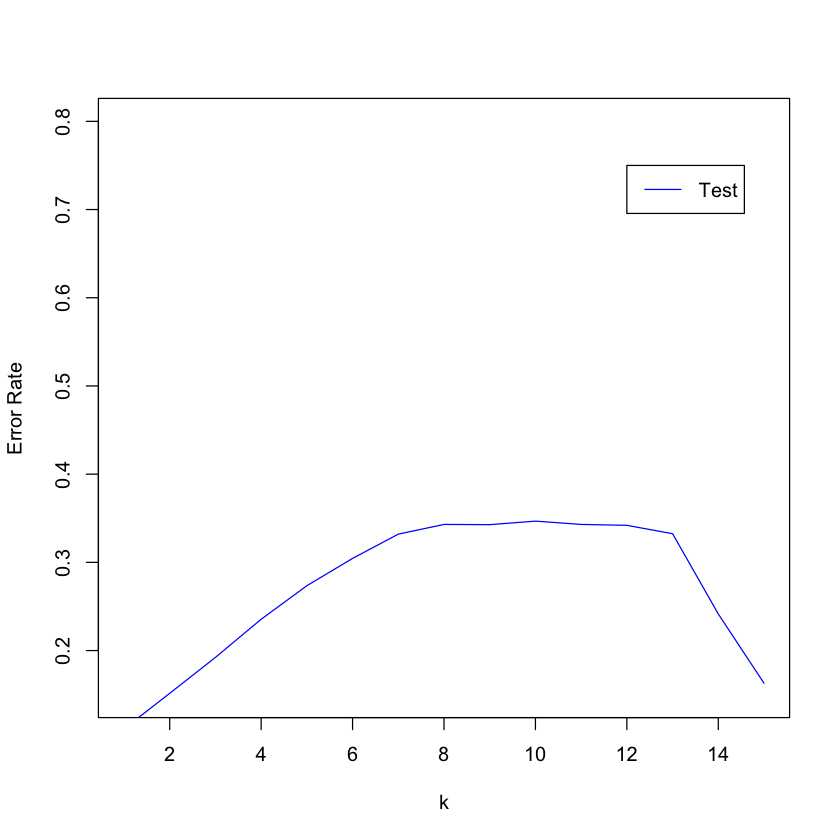

In [79]:
#Plotting the %Error on the test sample
plot(c(1,kmax),c(0.15,0.8),type="n", xlab="k",ylab="Error Rate")
lines(ER2, col="blue")
legend(12, 0.75, c("Test"),lty=c(1,1), col=c("blue"))

In [80]:
# Minimum Validation Error k
z <- which.min(ER2)
cat("Minimum Validation Error k:", z)

Minimum Validation Error k: 1

In [81]:
#Running knn for Minimum Validation Error k
prediction2 <- knn(train_input, test_input, train_output, k=z)
actual <- ifelse(caravan_df_test_normalized[,'Number_of_mobile_home_policies']>0,1,0)
predicted <- ifelse(as.numeric(prediction2)==1,0,1)
table(actual, predicted)

      predicted
actual    0    1
     0 3513  249
     1  196   42

In [82]:
#Running knn for Minimum Validation Error k with prob=TRUE
prediction2 <- knn(train_input, test_input, train_output, k=15, prob = TRUE)
prob <- attr(prediction2, "prob")

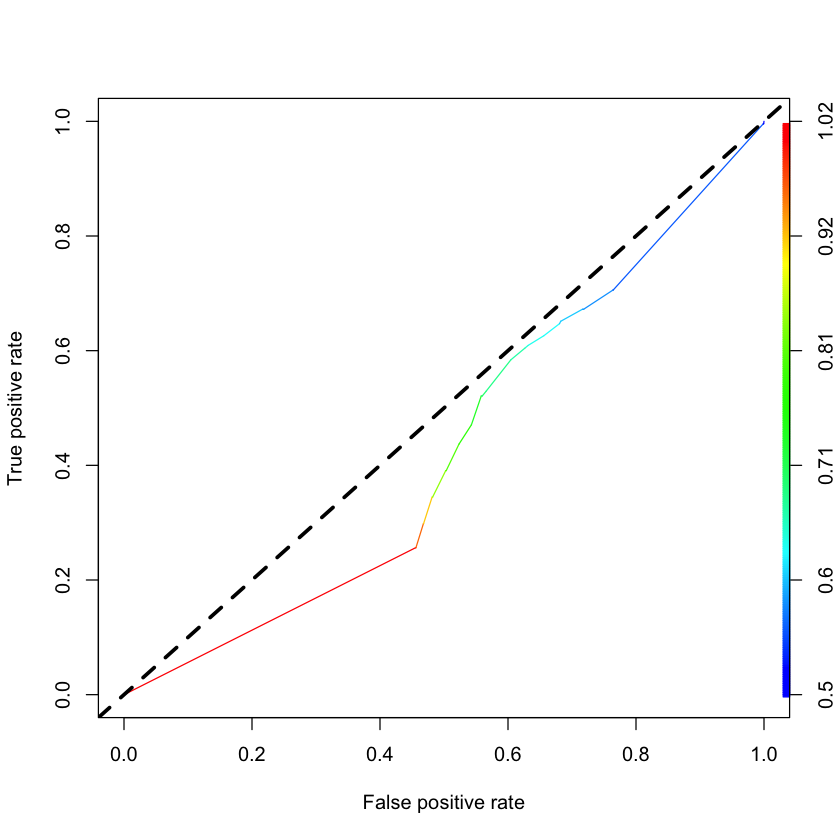

In [83]:
# Plot ROC and AUC for KNN
library(ROCR)
KNNPred <- prediction(prob, caravan_df_test$Number_of_mobile_home_policies)
KNNPerf <- performance(KNNPred, "tpr", "fpr")
plot(KNNPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$KNNO[i] <- prob[i]
    }

In [84]:
#AUC
performance(KNNPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.4286675


Slot "alpha.values":
list()


In [85]:
#Corresponding Performance Measures
KNNPrediction <- factor(as.factor(prediction2), labels = c("Not Purchased", "Purchased"))
KNNActual <- factor(as.factor(caravan_df_test_normalized[,'Number_of_mobile_home_policies']), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(KNNActual, KNNPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc      sens      spec       ppv       npv       lor 
0.8372500 0.3109244 0.8705476 0.1319073 0.9523117 1.1100077 
attr(,"negative")
[1] "Not Purchased"

# 5. Classification using Naive Bayes - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE

In [86]:
#NB Pre-Processing
caravan_df_trainNB <- caravan_df_train
caravan_df_testNB <- caravan_df_test

In [87]:
caravan_df_trainNB$Customer_Subtype <- as.factor(caravan_df_trainNB$Customer_Subtype)
caravan_df_testNB$Customer_Subtype <- as.factor(caravan_df_testNB$Customer_Subtype)
caravan_df_trainNB$Customer_main_type <- as.factor(caravan_df_trainNB$Customer_main_type)
caravan_df_testNB$Customer_main_type <- as.factor(caravan_df_testNB$Customer_main_type)

In [88]:
#Classification Using Naive Bayes
library(e1071)
# Can handle both categorical and numeric input,
# but output must be categorical
caravan_df_trainNB$Number_of_mobile_home_policies <- factor(caravan_df_trainNB$Number_of_mobile_home_policies, labels = c(0,1))
model <- naiveBayes(as.factor(Number_of_mobile_home_policies)~., data=caravan_df_trainNB)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.94022673 0.05977327 

Conditional probabilities:
   Customer_Subtype
Y              1            2            3            4            5
  0 0.0202776763 0.0138838144 0.0409207161 0.0091340884 0.0078553160
  1 0.0373563218 0.0172413793 0.0718390805 0.0057471264 0.0057471264
   Customer_Subtype
Y              6            7            8            9           10
  0 0.0195469492 0.0074899525 0.0526123493 0.0485933504 0.0284983559
  1 0.0344827586 0.0086206897 0.1465517241 0.0344827586 0.0258620690
   Customer_Subtype
Y             11           12           13           15           16
  0 0.0263061746 0.0173547680 0.0303251735 0.0009134088 0.0029229083
  1 0.0258620690 0.0459770115 0.0373563218 0.0000000000 0.0000000000
   Customer_Subtype
Y             17           18           19           20           21
  0 0.0016441359 0.003

In [89]:
#NB Prediction
tst <- caravan_df_testNB[,-86]
prediction <- predict(model, newdata = tst)
table(caravan_df_testNB$Number_of_mobile_home_policies, prediction, dnn=list('actual','predicted'))

      predicted
actual    0    1
     0  660 3102
     1   16  222

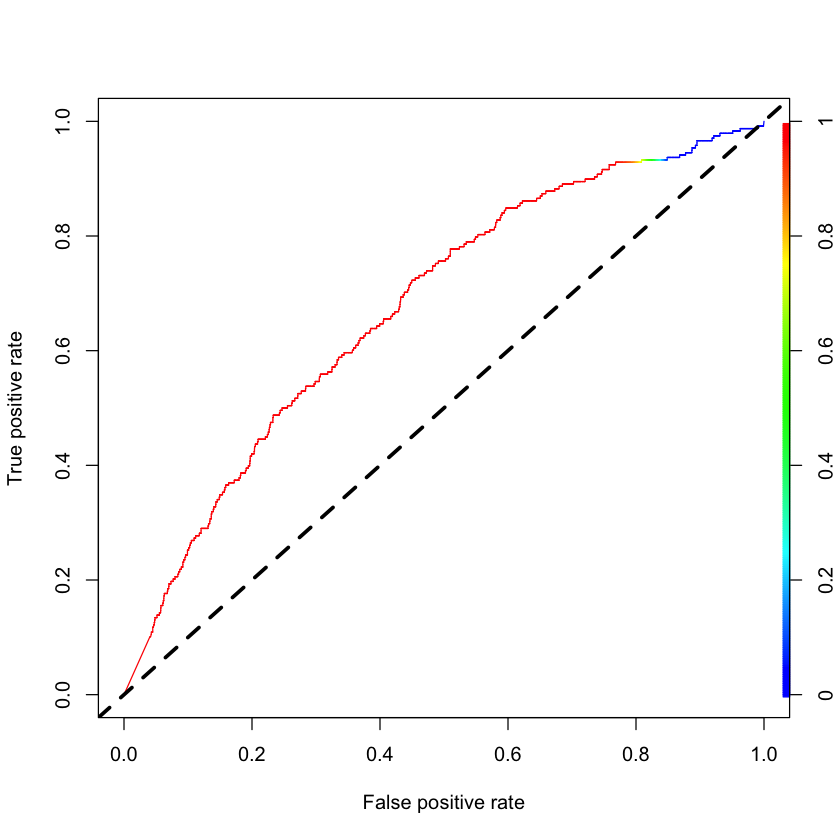

In [90]:
# Plot ROC and AUC for KNN
probs <- predict(model, tst, type="raw")
library(ROCR)
NBPred <- prediction(probs[,2], caravan_df_testNB$Number_of_mobile_home_policies)
NBPerf <- performance(NBPred, "tpr", "fpr")
plot(NBPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$NB[i] <- probs[i]
    }

In [91]:
#AUC
performance(NBPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6759942


Slot "alpha.values":
list()


In [92]:
#Corresponding Performance Measures
NBPrediction <- factor(as.factor(prediction), c(0, 1), labels = c("Not Purchased", "Purchased"))
NBActual <- factor(as.factor(caravan_df_testNB$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(NBActual, NBPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc      sens      spec       ppv       npv       lor 
0.2205000 0.9327731 0.1754386 0.0667870 0.9763314 1.0825262 
attr(,"negative")
[1] "Not Purchased"

### Naive Bayes Using Under Sampling

In [93]:
#Under Sampling Data
#Taking all the observations with dependent variable = 1
caravan_df_train_NB_Under <- caravan_df_trainNB[caravan_df_trainNB$Number_of_mobile_home_policies==1,]

In [94]:
#Randomly select observations with dependent variable = 0
zeroObs <- caravan_df_trainNB[caravan_df_trainNB$Number_of_mobile_home_policies==0,]
set.seed(123457)
rearrangedZeroObs <-  zeroObs[sample(nrow(zeroObs), length(caravan_df_train_NB_Under$Customer_Subtype)),]

In [95]:
#Appending rows of randomly selected 0s in our undersampled data frame
caravan_df_train_NB_Under <- rbind(caravan_df_train_NB_Under, rearrangedZeroObs)

In [96]:
#Let's verify that number of 1s and 0s in our undersampled data are equal
undersampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_NB_Under$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_NB_Under$Number_of_mobile_home_policies)))
undersampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,348
1,348


In [97]:
#Running NB on Undersampled Data
library(e1071)
# Can handle both categorical and numeric input,
# but output must be categorical
NBModelUnder <- naiveBayes(as.factor(Number_of_mobile_home_policies)~car_policies+Income_._30+moped_policies+fire_policies+Lower_level_education, data=caravan_df_train_NB_Under)
NBModelUnder


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  0   1 
0.5 0.5 

Conditional probabilities:
   car_policies
Y       [,1]     [,2]
  0 2.841954 2.911919
  1 4.718391 2.421328

   Income_._30
Y       [,1]     [,2]
  0 2.577586 2.032095
  1 1.913793 1.768613

   moped_policies
Y         [,1]      [,2]
  0 0.20402299 0.8007820
  1 0.07183908 0.4837534

   fire_policies
Y       [,1]     [,2]
  0 1.887931 1.883211
  1 2.531609 1.806690

   Lower_level_education
Y       [,1]     [,2]
  0 4.589080 2.363409
  1 3.747126 2.290028


In [98]:
#NB Prediction for undersampling
tst <- caravan_df_testNB[,-86]
prediction <- predict(NBModelUnder, newdata = tst)
table(caravan_df_testNB$Number_of_mobile_home_policies, prediction, dnn=list('actual','predicted'))

      predicted
actual    0    1
     0 2040 1722
     1   71  167

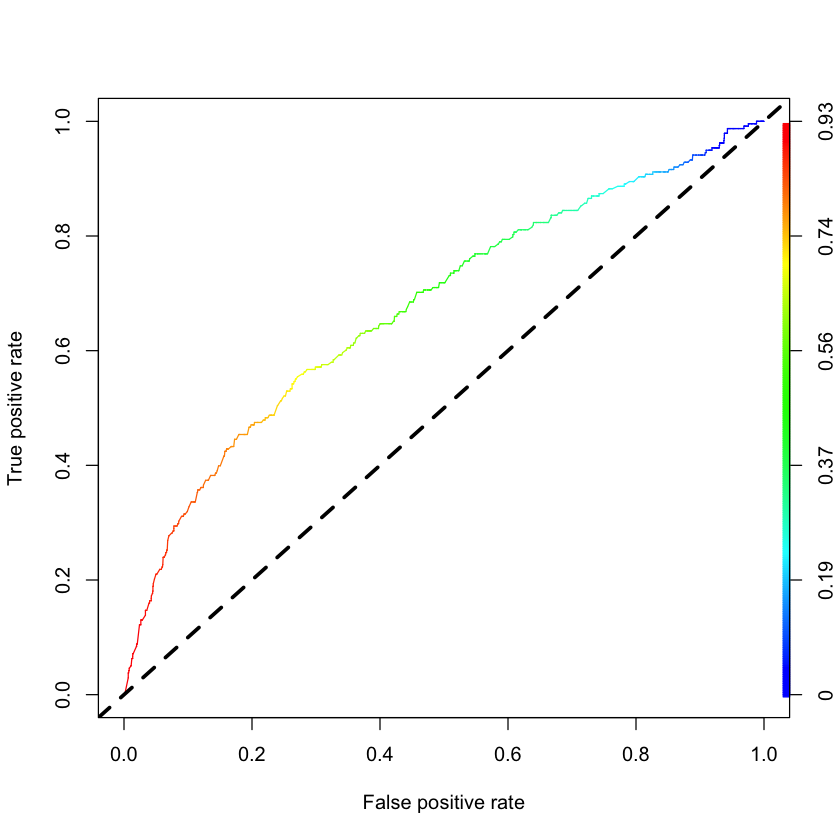

In [99]:
# Plot ROC and AUC for Undersampled NB
probs <- predict(NBModelUnder, tst, type="raw")
library(ROCR)
NBPred <- prediction(probs[,2], caravan_df_testNB$Number_of_mobile_home_policies)
NBPerf <- performance(NBPred, "tpr", "fpr")
plot(NBPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$NBU[i] <- probs[i]
    }

In [100]:
#AUC
performance(NBPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6755224


Slot "alpha.values":
list()


In [101]:
#Corresponding Performance Measures
NBPrediction <- factor(as.factor(prediction), c(0, 1), labels = c("Not Purchased", "Purchased"))
NBActual <- factor(as.factor(caravan_df_testNB$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(NBActual, NBPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc       sens       spec        ppv        npv        lor 
0.55175000 0.70168067 0.54226475 0.08840656 0.96636665 1.02477734 
attr(,"negative")
[1] "Not Purchased"

#### Naive Bayes Using Simplest Approach of Over Sampling

In [102]:
#First let's recall the ratio of 1s and 0s in our original training dataset
paste0("Ratio of 1s to 0s- 1:", as.numeric(table(caravan_df_trainNB$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_trainNB$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s- 1:15.7298850574713"

In [103]:
#Now let's duplicate the observations with dependent variable = 1 to make the ratio approximately 1:2
caravan_df_train_NB_OverDummy <- caravan_df_trainNB[caravan_df_trainNB$Number_of_mobile_home_policies==1,]
caravan_df_train_NB_Over <- NULL
for (i in 1:7){
    caravan_df_train_NB_Over <- rbind(caravan_df_train_NB_Over, caravan_df_train_NB_OverDummy)
}
caravan_df_train_NB_Over <- rbind(caravan_df_train_NB_Over, caravan_df_trainNB[caravan_df_trainNB$Number_of_mobile_home_policies==0,])

In [104]:
#Let's verify the number of 1s and 0s in our oversampled data
oversampled.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_NB_Over$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_NB_Over$Number_of_mobile_home_policies)))
oversampled.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,5474
1,2436


In [105]:
#Let's verify the ratio of 1s to 0s after over sampling
paste0("Ratio of 1s to 0s After Oversampling- 1:", as.numeric(table(caravan_df_train_NB_Over$Number_of_mobile_home_policies))[1]/as.numeric(table(caravan_df_train_NB_Over$Number_of_mobile_home_policies))[2])

[1] "Ratio of 1s to 0s After Oversampling- 1:2.24712643678161"

In [106]:
#Running NB on Oversampled Data
library(e1071)
# Can handle both categorical and numeric input,
# but output must be categorical
NBModelOver <- naiveBayes(as.factor(Number_of_mobile_home_policies)~car_policies+Income_._30+moped_policies+fire_policies+Lower_level_education, data=caravan_df_train_NB_Over)
NBModelOver


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6920354 0.3079646 

Conditional probabilities:
   car_policies
Y       [,1]     [,2]
  0 2.859335 2.914510
  1 4.718391 2.418343

   Income_._30
Y       [,1]     [,2]
  0 2.615638 2.097796
  1 1.913793 1.766433

   moped_policies
Y         [,1]      [,2]
  0 0.22415053 0.8288564
  1 0.07183908 0.4831570

   fire_policies
Y       [,1]     [,2]
  0 1.782974 1.875056
  1 2.531609 1.804462

   Lower_level_education
Y       [,1]     [,2]
  0 4.624954 2.288806
  1 3.747126 2.287205


In [107]:
#NB Prediction for oversampling
tst <- caravan_df_testNB[,-86]
prediction <- predict(NBModelOver, newdata = tst)
table(caravan_df_testNB$Number_of_mobile_home_policies, prediction, dnn=list('actual','predicted'))

      predicted
actual    0    1
     0 2736 1026
     1  107  131

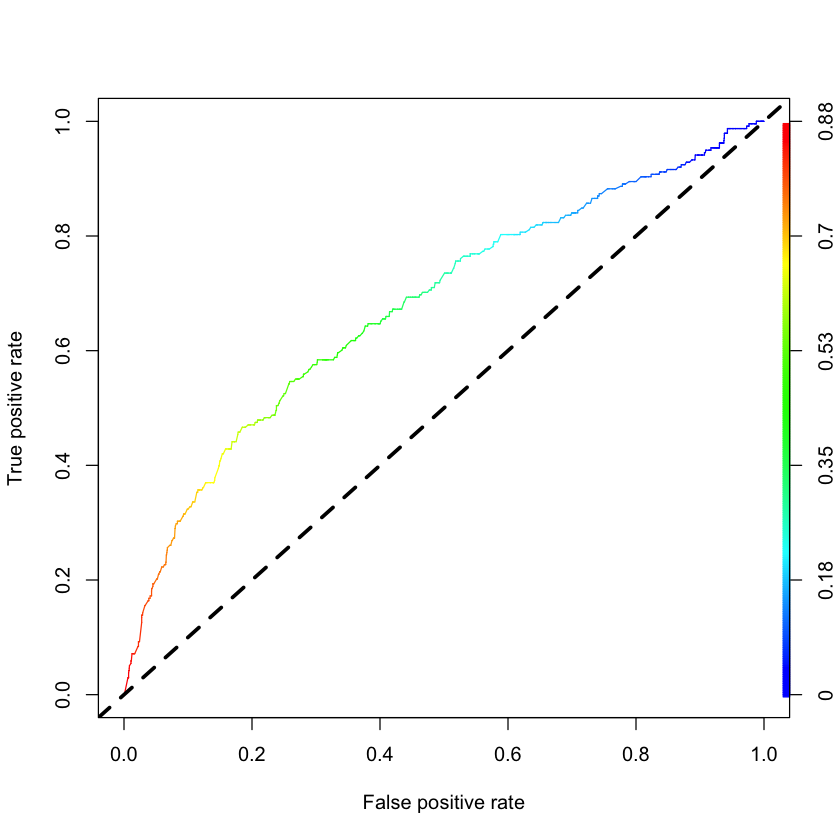

In [108]:
# Plot ROC and AUC for Oversampled NB
probs <- predict(NBModelOver, tst, type="raw")
library(ROCR)
NBPred <- prediction(probs[,2], caravan_df_testNB$Number_of_mobile_home_policies)
NBPerf <- performance(NBPred, "tpr", "fpr")
plot(NBPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$NBO[i] <- probs[i]
    }

In [109]:
#AUC
performance(NBPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6766459


Slot "alpha.values":
list()


In [110]:
#Corresponding Performance Measures
NBPrediction <- factor(as.factor(prediction), c(0, 1), labels = c("Not Purchased", "Purchased"))
NBActual <- factor(as.factor(caravan_df_testNB$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(NBActual, NBPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc      sens      spec       ppv       npv       lor 
0.7167500 0.5504202 0.7272727 0.1132239 0.9623637 1.1831977 
attr(,"negative")
[1] "Not Purchased"

### Naive Bayes Using SMOTE method for oversampling

In [111]:
library(DMwR)
set.seed(123457)
caravan_df_trainNB$Number_of_mobile_home_policies <- as.factor(caravan_df_trainNB$Number_of_mobile_home_policies)
caravan_df_train_NB_SMOTE <- SMOTE(Number_of_mobile_home_policies~., caravan_df_trainNB, perc.over = 600, perc.under = 262.2)

Loading required package: lattice

Attaching package: ‘DMwR’

The following object is masked from ‘package:plyr’:

    join



In [112]:
#Let's verify the number of 1s and 0s in our SMOTE data
SMOTE.Frequency.Number_of_mobile_home_policies <- data.frame(Number_of_mobile_home_policies = levels(as.factor(caravan_df_train_NB_SMOTE$Number_of_mobile_home_policies)), Count = as.numeric(table(caravan_df_train_NB_SMOTE$Number_of_mobile_home_policies)))
SMOTE.Frequency.Number_of_mobile_home_policies

Number_of_mobile_home_policies,Count
0,5474
1,2436


In [113]:
#Running NB on SMOTE Data
library(e1071)
# Can handle both categorical and numeric input,
# but output must be categorical
NBModelSMOTE <- naiveBayes(as.factor(Number_of_mobile_home_policies)~., data=caravan_df_train_NB_SMOTE)
NBModelSMOTE


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6920354 0.3079646 

Conditional probabilities:
   Customer_Subtype
Y              1            2            3            4            5
  0 0.0200949945 0.0138838144 0.0358056266 0.0087687249 0.0076726343
  1 0.0217569787 0.0102627258 0.1243842365 0.0032840722 0.0036945813
   Customer_Subtype
Y              6            7            8            9           10
  0 0.0219218122 0.0084033613 0.0575447570 0.0476799415 0.0325173548
  1 0.0188834154 0.0049261084 0.0845648604 0.1096059113 0.0151888342
   Customer_Subtype
Y             11           12           13           15           16
  0 0.0235659481 0.0157106321 0.0334307636 0.0007307271 0.0032882718
  1 0.0164203612 0.1100164204 0.0229885057 0.0000000000 0.0000000000
   Customer_Subtype
Y             17           18           19           20           21
  0 0.0014614541 0.0025575

In [114]:
#NB Prediction for SMOTE
tst <- caravan_df_testNB[,-86]
prediction <- predict(NBModelSMOTE, newdata = tst)
table(caravan_df_testNB$Number_of_mobile_home_policies, prediction, dnn=list('actual','predicted'))

      predicted
actual    0    1
     0 1007 2755
     1   34  204

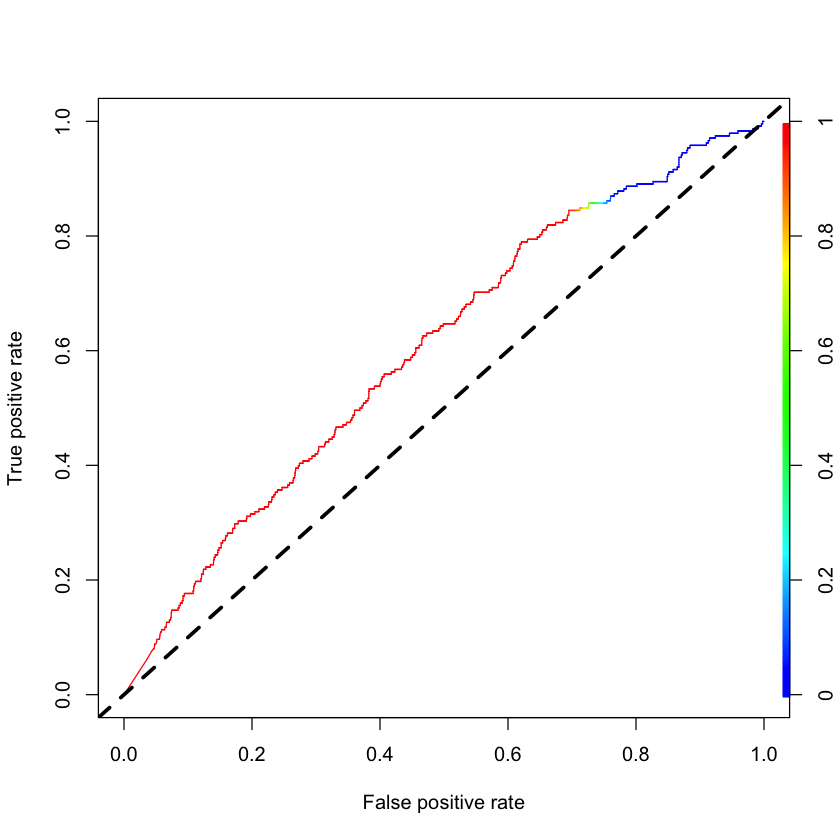

In [115]:
# Plot ROC and AUC for SMOTE NB
probs <- predict(NBModelSMOTE, tst, type="raw")
library(ROCR)
NBPred <- prediction(probs[,2], caravan_df_testNB$Number_of_mobile_home_policies)
NBPerf <- performance(NBPred, "tpr", "fpr")
plot(NBPerf, colorize=TRUE)
abline(a=0, b=1, lty=2, lwd=3, col="black")
for (i in 1:4000){
    probabilityDF$NBS[i] <- probs[i]
    }

In [116]:
#AUC
performance(NBPred, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6028541


Slot "alpha.values":
list()


In [117]:
#Corresponding Performance Measures
NBPrediction <- factor(as.factor(prediction), c(0, 1), labels = c("Not Purchased", "Purchased"))
NBActual <- factor(as.factor(caravan_df_testNB$Number_of_mobile_home_policies), c(0, 1), labels = c("Not Purchased", "Purchased"))
library(crossval)
CMNB <- confusionMatrix(NBActual, NBPrediction, negative = "Not Purchased" )
diagnosticErrors(CMNB)

acc       sens       spec        ppv        npv        lor 
0.30275000 0.85714286 0.26767677 0.06894221 0.96733910 0.78531764 
attr(,"negative")
[1] "Not Purchased"

In [118]:
write.csv(probabilityDF, file = "probabilityDF.csv")

# 6. Classification using Bagging - Unbalanced Data, Undersampled Data, Oversampled Data

### Bagging using unbalanced data

In [ ]:
#Bagging using unbalanced data
library(randomForest)
library(plyr)
library(caret)
TrainDataset <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Train.csv')

TestDataset <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/Test_with_Targer_Variable.csv')
set.seed(123457)

#Bagging
bag.train <- randomForest(as.factor(Number_of_mobile_home_policies) ~ ., data = TrainDataset, mtry = 85, importance = TRUE)
bag.train

In [ ]:
#Bagging Prediction For unbalanced data
yhat.bag <- predict(bag.train, newdata = TestDataset)
PredictedClass <- ifelse(yhat.bag > 0.5, 1, 0)

#Confusion Matrix
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass <- as.factor(PredictedClass)
levels(PredictedClass)
str(PredictedClass)
str(actual)

confusionMatrix(PredictedClass, actual, positive = "1")

### Bagging using undersampled data

In [ ]:
data_balanced_under <- ovun.sample(Number_of_mobile_home_policies ~., data = TrainDataset, method = "under", N = 696, seed = 1)$data
table(data_balanced_under$Number_of_mobile_home_policies)

#Bagging on under sampled data
bag.train.under <- randomForest(as.factor(Number_of_mobile_home_policies) ~ ., data = data_balanced_under, mtry = 86, importance = TRUE)
bag.train.under

#Prediction on under sampled data
yhat.bag.under <- predict(bag.train.under, newdata = TestDataset)
mean((yhat.bag.under-TestDataset)^2)

PredictedClass.under <- ifelse(yhat.bag.under > 0.5, 1, 0)
#Confusion Matrix of under sampled data
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.under <- as.factor(PredictedClass.under)
levels(PredictedClass.under)
str(PredictedClass.under)
str(actual)

confusionMatrix(PredictedClass.under, actual, positive = "1")

#Roc curve of under sampled data
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.bag.under)

### Bagging using over sampled data

In [ ]:
data_balanced_over <- ovun.sample(Number_of_mobile_home_policies ~. , data = TrainDataset, method = "over", N = 10948)$data
#N refers to number of observations in the resulting balanced dataset. We had originally 5474 negative observations. 

#Bagging on Over sampled data
bag.train.over <- randomForest(as.factor(Number_of_mobile_home_policies) ~ ., data = data_balanced_over, mtry = 86, importance = TRUE)
bag.train.over

#Prediction on over sampled data
yhat.bag.over <- predict(bag.train.over, newdata = TestDataset)
mean((yhat.bag.over-TestDataset)^2)

PredictedClass.over <- ifelse(yhat.bag.over > 0.5, 1, 0)

#Confusion Matrix of Over sampled data
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.over <- as.factor(PredictedClass.over)
levels(PredictedClass.over)
str(PredictedClass.over)
str(actual)

confusionMatrix(PredictedClass.over, actual, positive = "1")

#Roc curve of Over sampled data
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.bag.over)

# 7. Classification using Boosting - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each Model

### Boosting using unbalanced data

In [ ]:
library(tree)
library(gbm)
library(ROSE)
library(caret)

TrainDataset <- read.csv("/Users/sheenakhemani/Documents/SpringSem/Data Mining/Project/Data_sets/Train.csv")
attach(TrainDataset)

TestDataset <- read.csv("/Users/sheenakhemani/Documents/SpringSem/Data Mining/Project/Data_sets/Test_with_Targer_Variable.csv")
attach(TestDataset)

set.seed(123457)

#Boosting on training set
boost.train1 <- gbm(Number_of_mobile_home_policies ~., data = TrainDataset, distribution = "bernoulli", n.trees = 1000, interaction.depth = 4)
summary(boost.train1)

#car policies and fire policies seems to be the most important variables
#producing partial dependance plots for the above 2 variables
par(mfrow = c(1,2))
plot(boost.train1, i = "car_policies")
plot(boost.train1, i = "fire_policies")

#Boosting to predict on test dataset
yhat.boost.test1 <- predict.gbm(boost.train1, newdata = TestDataset, n.trees = 1000 )
mean((yhat.boost.test1 - TestDataset)^2)
#test MSE obtained is 34.138



#Confusion Matrix
PredictedClass.test1 <- ifelse(yhat.boost.test1 > 0.5, 1, 0)
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.test1 <- as.factor(PredictedClass.test1)
levels(PredictedClass.test1)
str(PredictedClass.test1)
str(actual)

confusionMatrix(PredictedClass.test1, actual, positive = "1")

### Boosting on under sampled data

In [ ]:
data_balanced_under <- ovun.sample(Number_of_mobile_home_policies ~., data = TrainDataset, method = "under", N = 696, seed = 1)$data
table(data_balanced_under$Number_of_mobile_home_policies)

#Boosting on under sampled data
boost.train.under <- gbm(Number_of_mobile_home_policies ~., data = data_balanced_under, distribution = "bernoulli", n.trees = 1000, interaction.depth = 4)
summary(boost.train.under)

#Predictions on under sampled data
yhat.boost.test.under <- predict(boost.train.under, newdata = TestDataset, n.trees = 1000)
mean((yhat.boost.test.under - TestDataset)^2)

#Confusion Matrix - under sampled
PredictedClass.under <- ifelse(yhat.boost.test.under > 0.5, 1, 0)

actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.under <- as.factor(PredictedClass.under)
levels(PredictedClass.under)
str(PredictedClass.under)
str(actual)

confusionMatrix(PredictedClass.under, actual, positive = "1")

#Evaluating Accuracy of under sampled using ROC
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.boost.test.under)


### Boosting using over sampled data

In [ ]:
#Over Sampling 
data_balanced_over <- ovun.sample(Number_of_mobile_home_policies ~. , data = TrainDataset, method = "over", N = 10948)$data
#N refers to number of observations in the resulting balanced dataset. We had originally 5474 negative observations. 
table(data_balanced_over$Number_of_mobile_home_policies)

#Boosting on over sampled data
boost.train.over <- gbm(Number_of_mobile_home_policies ~., data = data_balanced_over, distribution = "bernoulli", n.trees = 1000, interaction.depth = 4)
summary(boost.train.over)

#Predictions on over sampled data
yhat.boost.test.over <- predict(boost.train.over, newdata = TestDataset, n.trees = 1000)
mean((yhat.boost.test.over - TestDataset)^2)

#Confusion Matrix - Over sampled
PredictedClass.over <- ifelse(yhat.boost.test.over > 0.5, 1, 0)
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.over <- as.factor(PredictedClass.over)
levels(PredictedClass.over)
str(PredictedClass.over)
str(actual)

confusionMatrix(PredictedClass.over, actual, positive = "1")

#Evaluating Accuracy of over sampled using ROC
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.boost.test.over)

# 8. Classification using Random Forest - Unbalanced Data, Undersampled Data, Oversampled Data, SMOTE - Including Business Cost For Each

### Random Forest using unbalanced data

In [ ]:
library(randomForest)
library(plyr)
library(caret)
TrainDataset <- read.csv("/Users/sheenakhemani/Documents/SpringSem/Data Mining/Project/Data_sets/Train.csv")
attach(TrainDataset)

TestDataset <- read.csv("/Users/sheenakhemani/Documents/SpringSem/Data Mining/Project/Data_sets/Test_with_Targer_Variable.csv")
attach(TestDataset)
set.seed(123457)

#RandomForest
rf.train <- randomForest(as.factor(Number_of_mobile_home_policies) ~., data = TrainDataset, mtry = 9, importance = TRUE)
rf.train

yhat.rf <- predict(rf.train, newdata = TestDataset)
mean((yhat.rf-TestDataset)^2)
# test MSE = 15.46

importance(rf.train)


#Confusion Matrix
PredictedClass <- ifelse(yhat.rf > 0.5, 1, 0)
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass <- as.factor(PredictedClass)
levels(PredictedClass)
str(PredictedClass)
str(actual)

confusionMatrix(PredictedClass, actual, positive = "1")

#ROC Curve
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.rf, plotit = F)

### Random Forest using Under sampling

In [ ]:
#Under sampling 
data_balanced_under <- ovun.sample(Number_of_mobile_home_policies ~., data = TrainDataset, method = "under", N = 696, seed = 1)$data
table(data_balanced_under$Number_of_mobile_home_policies)

#RandomForest on under sampled data
rf.train.under <- randomForest(as.factor(Number_of_mobile_home_policies) ~., data = data_balanced_under, mtry = 9, importance = TRUE)
rf.train.under

yhat.rf.under <- predict(rf.train.under, newdata = TestDataset)
mean((yhat.rf.under-TestDataset)^2)
# test MSE = 15.46

importance(rf.train.under)

#Confusion Matrix
PredictedClass.under <- ifelse(yhat.rf.under > 0.5, 1, 0)
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.under <- as.factor(PredictedClass.under)
levels(PredictedClass.under)
str(PredictedClass.under)
str(actual)

confusionMatrix(PredictedClass.under, actual, positive = "1")

#ROC Curve
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.rf.under, plotit = F)

### Random Forest Over Sampled Data

In [ ]:
#Over Sampling 
data_balanced_over <- ovun.sample(Number_of_mobile_home_policies ~. , data = TrainDataset, method = "over", N = 10948)$data

#RandomForest on over sampled data
rf.train.over <- randomForest(as.factor(Number_of_mobile_home_policies) ~., data = data_balanced_over, mtry = 9, importance = TRUE)
rf.train.over

yhat.rf.over <- predict(rf.train.over, newdata = TestDataset)
mean((yhat.rf.over-TestDataset)^2)
# test MSE = 15.46

importance(rf.train.over)

#Confusion Matrix
PredictedClass.over <- ifelse(yhat.rf.over > 0.5, 1, 0)
actual <- (TestDataset$Number_of_mobile_home_policies)
actual <- as.factor(actual)
PredictedClass.over <- as.factor(PredictedClass.over)
levels(PredictedClass.over)
str(PredictedClass.over)
str(actual)

confusionMatrix(PredictedClass.over, actual, positive = "1")

#ROC Curve
roc.curve(TestDataset$Number_of_mobile_home_policies, yhat.rf.over, plotit = F)

# 9. Summary of Performance Measures For All Models

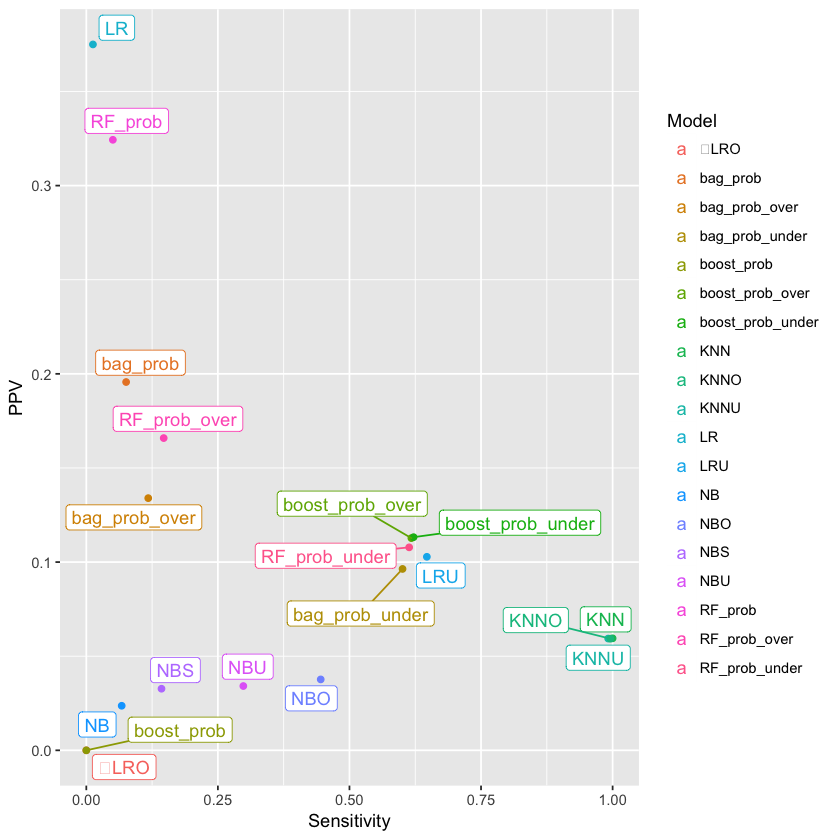

In [147]:
options(warn=-1)
library(ggrepel)
library(ggplot2)
library(plyr)
Sensitivity <- c(0.012605042,	0.647058824,	0,	1,	0.991596639,	0.995798319,	0.067226891,	0.298319328,	0.445378151,	0.142857143,	0,	0.617647059,	0.621848739,	0.075630252,	0.117647059,	0.600840336,	0.050420168,	0.147058824,	0.613445378)
PPV <- c(0.375,	0.102803738,	0,	0.0595,	0.059371069,	0.059294471,	0.023668639,	0.034151034,	0.037668799,	0.032723773,	0,	0.112730061,	0.113236419,	0.195652174,	0.133971292,	0.096361186,	0.324324324,	0.165876777,	0.107828656)
Model<- c("LR" , 	"LRU" , "	LRO" ,	"KNN" ,	"KNNU" , 	"KNNO" , 	"NB" , 	"NBU" , 	"NBO" ,	"NBS" ,	"boost_prob" ,	"boost_prob_over" ,	"boost_prob_under" ,	"bag_prob" ,	"bag_prob_over" ,	"bag_prob_under" ,	"RF_prob" ,	"RF_prob_over" ,	"RF_prob_under")

## PLoting ppv anf sensitivity from all models cutoff = 0.5 from file ppv_sev.csv
df1 <- data.frame(col1= Sensitivity, col2= PPV , col3= Model)

ggplot(df1, aes(x=Sensitivity, y=PPV , color = Model , label = Model ))+
  ##geom_point(aes(size=17.5)) +
  geom_point() + geom_label_repel(aes(label=Model),hjust=0, vjust=0)


# 10. Business Profits associated with all our 18 models

Warning message:
“Ignoring unknown aesthetics: z”

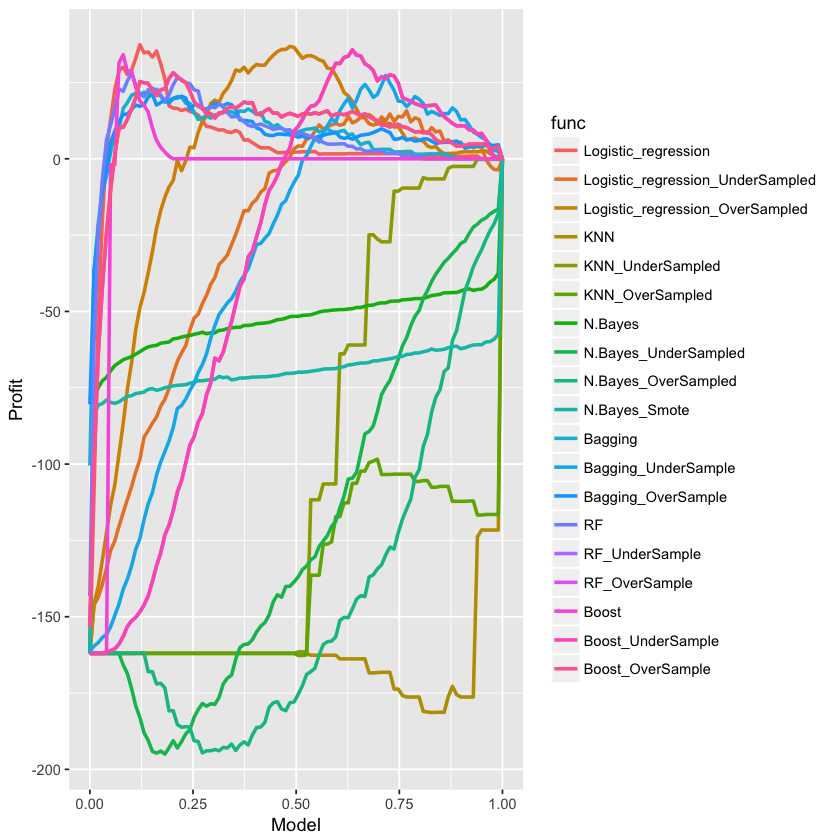

In [131]:
library(ggplot2)
library(reshape2)

cutoff <- seq(0 ,1 , length = 100)


##Importing Probabilities for every model
prob_df <- read.csv('/Users/sheenakhemani/Downloads/DMPA_Team6_Project/probability_df.csv')

## Function to calculate frofit for all cutoff values
profit <- function(x){
  
  revenue <- numeric(100)
  cost <- numeric(100)
  
  profit_table <- data.frame("cutoff" = cutoff , "revenue" = revenue, "cost" = cost)
  
  actual <- prob_df$Actual
  predict <- x
  
  c_s_cost <- 0.1
  revenue <- 1
  
  for(i in 1:100)
  {
    profit_table$revenue[i] <- sum(predict > cutoff[i] & actual == "1")
    profit_table$cost[i] <- sum(predict > cutoff[i] )
  }
  
  profit_table$profit <-revenue*profit_table$revenue  - c_s_cost*profit_table$cost
  
  return(profit_table$profit)
  
}


profit_df <- data.frame("cutoff" = cutoff)

## Logistic Regression
profit_df$Logistic_regression <- profit(prob_df$LR)
profit_df$Logistic_regression_UnderSampled <- profit(prob_df$LRU)
profit_df$Logistic_regression_OverSampled <- profit(prob_df$LRO)

## K-Nearest Neighbour
profit_df$KNN <- profit(prob_df$KNN)
profit_df$KNN_UnderSampled <- profit(prob_df$KNNU)
profit_df$KNN_OverSampled <- profit(prob_df$KNNO)

## Naive Bayes
profit_df$N.Bayes <- profit(prob_df$NB)
profit_df$N.Bayes_UnderSampled <- profit(prob_df$NBU)
profit_df$N.Bayes_OverSampled <- profit(prob_df$NBO)
profit_df$N.Bayes_Smote <- profit(prob_df$NBS)

## Bagging
profit_df$Bagging <- profit(prob_df$bag_prob)
profit_df$Bagging_UnderSample <- profit(prob_df$bag_prob_under)
profit_df$Bagging_OverSample <- profit(prob_df$bag_prob_over)

## Random Forest
profit_df$RF <- profit(prob_df$RF_prob)
profit_df$RF_UnderSample <- profit(prob_df$RF_prob_under)
profit_df$RF_OverSample <- profit(prob_df$RF_prob_over)

## boosting
profit_df$Boost <- profit(prob_df$boost_prob)
profit_df$Boost_UnderSample <- profit(prob_df$RF_prob_under)
profit_df$Boost_OverSample <- profit(prob_df$RF_prob_over)

chart_data <- melt(profit_df, id='cutoff')
names(chart_data) <- c('x', 'func', 'value')

ggplot() +
  geom_line(data = chart_data, aes(x = x, y = value , z = x, color = func), size = 1)+
  xlab("Model") +
  ylab("Profit")